### __Predicting Used Car Sale Prices__

**Overview:**   
- The goal is to predict prices of used cars based on car characteristics and regression models 


---

## Problem Description and Initial Data Analysis


In [3]:
#import data
import pandas as pd
import numpy as np

# Name DataFrame 
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
#View dataset info 
# print(train_df.info(10))

#View summary statistics
train_df.describe()

#View missing value:
# train_df_null = train_df.isnull().sum()
# print(train_df_null.loc[train_df.isnull().any()])
# test_df_null = test_df.isnull().sum()
# print(test_df_null.loc[test_df.isnull().any()])

,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,savings_amount,seller_rating,year,price
count,2912.000000,3500.000000,3500.000000,3375.000000,2912.000000,3375.000000,3500.000000,3500.000000,3297.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,21.655220,78.987714,11876.966857,2749.185185,28.658997,242.296889,40.549032,-74.212195,39277.213224,830.168286,3.934368,2017.015714,27133.806000
std,7.520448,104.838545,10893.589741,1115.578544,7.160677,87.287417,3.426925,2.947159,47300.958932,1318.130267,0.542599,4.037270,16502.784211
min,10.000000,0.000000,922.000000,1000.000000,13.000000,78.000000,18.398800,-84.346600,0.000000,0.000000,1.000000,1978.000000,899.000000
25%,18.000000,17.000000,7036.000000,2000.000000,25.000000,176.000000,40.745700,-74.075800,14.000000,0.000000,3.577778,2016.000000,15995.000000
50%,21.000000,39.500000,8812.000000,2400.000000,28.000000,240.000000,40.855800,-73.726800,25983.000000,206.000000,4.115385,2018.000000,25488.000000
75%,24.000000,82.000000,11706.000000,3500.000000,31.000000,292.000000,41.091200,-73.258700,57778.000000,1255.750000,4.375000,2020.000000,34012.500000
max,127.000000,698.000000,49203.000000,7000.000000,122.000000,797.000000,42.785100,-66.078500,329145.000000,12801.000000,5.000000,2021.000000,207900.000000


**Forecasting Problem Overview:**

The aim of this project is to develop a predictive model for estimating the prices of cars based on a set of attributes associated with each vehicle. The process involves a series of steps, including exploratory data analysis, data cleaning, filling in any missing data points, constructing predictive models, and ultimately generating price forecasts. In brief, this forecasting problem has practical applications in various sectors, from the used car market to the automotive industry, online car marketplaces, financial institutions, and governmental bodies. Accurate predictions of car prices based on attributes can enhance decision-making, promote transparency, and support fair transactions in the automotive sector.

**Real-World Applications:**

This forecasting problem has significant real-world applications and implications, some of which are as follows:

1. Used Car Market Pricing: In the context of the used car market, accurately forecasting the prices of cars can be invaluable. Buyers, sellers, and dealers can use these forecasts to negotiate fair and competitive prices for pre-owned vehicles. This ensures that both buyers and sellers have a clear understanding of a vehicle's market value.

2. Automotive Industry Insights: Car manufacturers and dealerships can employ such models to understand how various attributes, such as make, model, year, and mileage, influence car prices. This knowledge can help them make informed decisions regarding pricing, inventory management, and marketing strategies.

3. Online Car Marketplaces: Online platforms that facilitate the buying and selling of cars can benefit from accurate price forecasts. These forecasts can be used to provide users with estimated values for their listed cars, enabling them to set reasonable selling prices. Additionally, buyers can use these forecasts as reference points to assess the fairness of a listed price.

4. Financial and Insurance Sectors: Banks and insurance companies often require accurate valuations of vehicles for loan and insurance purposes. Predictive models for car prices can assist in establishing fair market values, reducing the risk of overvaluation or undervaluation.

5. Government and Taxation: Government agencies may use car price forecasts to assess and levy taxes based on the value of vehicles. This ensures equitable taxation and revenue collection in accordance with market values.

**Evaluation Criteria**

For evaluation criteria, we used The Root Mean Squared Error (RMSE) which is a widely used evaluation criteria to assess forecast performance, especially in regression and prediction tasks. It quantifies the accuracy of a predictive model's forecasts by measuring the magnitude of the errors between predicted values and actual observed values.


RMSE Calculation step by step:

1. Calculate Residuals: First, the model's forecasts (predicted values) are subtracted from the actual observed values for each data point. These differences are known as residuals or errors.

2. Square the Residuals: To emphasize the magnitude of errors and to ensure that negative and positive errors don't cancel each other out, the residuals are squared.

3. Average the Squared Residuals: The squared residuals are then averaged across all data points.

4. Take the Square Root: The final step is to take the square root of the average of the squared residuals. This square root operation returns the RMSE, which is in the same unit as the data being forecasted.


**Dataset Summary:**

This dataset contains information related to vehicles listed for sale, including various attributes and details for each vehicle. Below is a summary of the main characteristics of the dataset:

1. Vehicle Identification (VIN):
   - Each vehicle is uniquely identified by a Vehicle Identification Number (VIN).

2. Vehicle Attributes:
   - The dataset includes a wide range of attributes describing each vehicle, such as its body type, engine type, exterior and interior colors, and more.

3. Listing Information:
   - Information about the listing, including the city where the vehicle is listed, the number of days the vehicle has been on the market, and the date it was listed.

4. Dealer Information:
   - Details about the dealers, including their location indicated by latitude and longitude, and whether they are franchise dealers.

5. Vehicle Specifications:
   - Specifications like engine displacement, fuel type, fuel tank capacity, height, length, maximum seating capacity, and width are provided.

6. Performance and Mileage:
   - Details on vehicle performance, such as highway fuel economy, horsepower, torque, and mileage.

7. Additional Information:
   - Information about the vehicle's age (whether it is new or not) and the number of accidents registered for the vehicle.

8. Price and Savings:
   - The listed price of the vehicle and the amount saved, along with the seller's rating.

9. Transmission and Wheel System:
   - Transmission type and number of gears, as well as the type of wheel drive (e.g., AWD, FWD, 4WD, RWD).

10. Manufacturer and Model:
    - Details about the manufacturer's name and the specific model of the vehicle.

11. Year of Release:
    - The year in which the vehicle was released into the market.



**Types of Variables/Features:**


|Variable Kind|Number of Features|Feature Names
| :---: | :---: | :---: |  
|Numerical| 24 | 'vin', 'back_legroom', 'city_fuel_economy', 'daysonmarket', 'dealer_zip', 'engine_displacement', 'front_legroom', 'fuel_tank_volume', 'height', 'highway_fuel_economy', 'horsepower', 'latitude', 'length', 'listed_date',  'longitude', 'maximum_seating', 'mileage', 'power', 'savings_amount', 'seller_rating', 'torque', 'wheelbase', 'width', 'year'|
|Categorical - Nominal| 11 | 'body_type', 'city', 'engine_type', 'exterior_color', 'fuel_type', 'interior_color', 'listing_color', 'make_name', 'model_name', 'transmission', 'wheel_system'| 
|Categorical - Ordinal| 01 |  'transmission_display'|
|Boolean| 02 |'franchise_dealer', 'is_new'|
| **Total** | **38**|

Comparing the definitions of the variables and the values of the data itself, the table above illustrate the kind of variables, count of features and their respective names. The dataset has 39 columns which includes 38 features and 1 target. In this table, only features are listed. The majority of features are numeric (24 features) and the smallest number of features belong to Boolean with only 2 features.   


**In terms of the two datasets, summary number of features that have missing values:**

|Features|Missing values in training dataset |Missing values in test dataset|
| :---: | :---: | :---: |  
|back_legroom| 103 | 53|
|body_type| 6 | 2|
| city_fuel_economy       | 588 | 237 |
| engine_displacement     | 125 | 59 |
| engine_type              | 50 | 36 |
| front_legroom           | 103 | 53 |
| fuel_tank_volume        | 103 | 53 |
| fuel_type                | 37 | 29 | 
| height                  | 103 | 53 |
| highway_fuel_economy    | 588 | 237 |
| horsepower              | 125 | 59 |
| length                  | 103 | 53 |
| maximum_seating         | 103 | 53 |
| mileage                 | 203 | 76 |
| power                   | 299 | 126 |
| seller_rating | 0 | 3 |
| torque                  | 331 | 141 |
| transmission             | 60 | 13 |
| transmission_display     | 60 | 13 |
| wheel_system            | 101 | 43 |
| wheelbase               | 103 | 53 |
| width                   | 103 | 53 |

---

## Data Cleaning, Missing Observations and Feature Engineering

In [2]:
# List of columns to be cleaned
columns_to_clean = [
    'back_legroom', 'front_legroom', 'fuel_tank_volume', 'height',
    'length', 'maximum_seating', 'wheelbase', 'width'
]

# Extract numerical values from the columns
for column in columns_to_clean:
    train_df[column] = train_df[column].str.extract('(\d+\.\d+|\d+)').astype('float')
    test_df[column] = test_df[column].str.extract('(\d+\.\d+|\d+)').astype('float')

# Display the first few rows of the cleaned training dataset
# train_df[columns_to_clean].head()

In Task 2, the dataset `train_df` and `test_df` will be cleaned separately to maintain the integrity of the modeling process and ensure unbiased predictions. The team has considered reasons such as to avoid data leakage, handle differences in distributions to come out with this decision. Every steps carried out for `train_df` will be replicated to `test_df`. 

Firstly, I listed all numerical features that needed to format in a variable `columns_to_clean`. 

Since the position of the number is the 1st part of the string, I use `.str.extract('(\d+\.\d+|\d+)')` to extract the number part from the string as specified format. Afterwards, I changed them from `string` type to `float` type using astype('float'). 

This ensures that numerical features are cleaned and can be used in training algorithms.

In [3]:
#define function to creat 5 new features:
def create_features(df):
    # Extract power_value and power_rpm from power
    df['power_value'] = df['power'].str.split(' ').str[0].astype(float)
    # Remove commas and convert to number
    df['power_rpm'] = pd.to_numeric(df['power'].str.split(' ').str[-2].str.replace(',', ''), errors='coerce')

    # Extract torque_value and torque_rpm from torque
    df['torque_value'] = df['torque'].str.split(' ').str[0].astype(float)
    df['torque_rpm'] = df['torque'].str.split(' ').str[-2]
    # Remove commas and convert to number
    df['torque_rpm'] = pd.to_numeric(df['power'].str.split(' ').str[-2].str.replace(',', ''), errors='coerce')

    # Extract num_gears and transmission_type from transmission_display
    df['num_gears'] = df['transmission_display'].str.extract('(\d+)').astype(float)

    # List of columns to drop
    columns_to_drop = ['power', 'torque', 'transmission_display']
    # Drop the specified columns
    df = df.drop(columns=columns_to_drop)
    return df

#Apply function to train_df and test_df:
train_df = create_features(train_df)
test_df = create_features(test_df)

In this part, I extracts new features from existing numerical variables that are 'power', 'torque', 'transmission_display'. 
- For `power` and `torque`, the same parttern can be seen in the dataset. We will split the string by spacing, then select the position [0] and [-2] for 2 new columns. In `power_rpm` and `torque_rpm`, the number format is using a comma in between the number, we will remove this to convert the string to numeric format. 
- From 'transmission_display', I extract `num_gears` representing the number of gears in the vehicle's transmission. Since the lateral part as Automatic, CVT, etc are represented in `transmission`, we will just keep the number part and make it numeric to feed into the model. 
- Additionally, the code also drops the original columns ('power', 'torque', 'transmission_display') after extracting the necessary information, ensuring a more streamlined and focused dataset for further analysis and modeling.

In [4]:
#define function to impute missing values:
def impute_missing_val(df):
    # Find columns with missing values and save their names into a list
    columns_with_missing_values = df.columns[df.isnull().any()].tolist()

    # Group by 'make_name' and 'model_name', then fill missing values with the same value within each group
    for column in columns_with_missing_values:
        df[column] = df.groupby(['make_name', 'model_name'])[column].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

    # Replace NaN values in numerical columns with the mean of the column and NaN values in non-numerical columns with the mode of the column
    categorical = ['body_type', 'city', 'engine_type', 'exterior_color', 'fuel_type', 'interior_color', 'listing_color', 
                   'make_name', 'model_name', 'transmission', 'wheel_system','transmission_display', 'franchise_dealer', 
                   'is_new', 'num_gears'] 
    numerical = ['back_legroom', 'city_fuel_economy', 'daysonmarket', 'dealer_zip', 'engine_displacement', 'front_legroom', 
                 'fuel_tank_volume', 'height', 'highway_fuel_economy', 'horsepower', 'latitude', 'length', 'longitude', 
                 'maximum_seating', 'mileage', 'savings_amount', 'seller_rating', 'wheelbase', 'width', 'year', 
                 'power_value', 'power_rpm', 'torque_value', 'torque_rpm']

    for column in df.columns:
        if column in categorical:  # Categorical columns
            df[column].fillna(df[column].mode()[0], inplace=True)
        if column in numerical:  #numeric columns
            df[column].fillna(df[column].mean(), inplace=True)
    return df

#Apply function to train_df and test_df:
train_df = impute_missing_val(train_df)
test_df = impute_missing_val(test_df)

- As we identified that `make_name` and `model_name` does not have missing value, and same car will have similar features like width, height, etc. we will try to impute missing value of a car with its similar `make_name` and `model_name` (or basically the same car model). 
- After that, with the remaining missing value, we will impute base on a rule: using mode for categorical data and mean for numerical data (which we have define types of data in Task 1). 
Here we acknowledged that since we imputed train and test separately, the mean and mode value of each column might be different from the 2 datasets. And this is the key point of this method where we keep the differences in distributions. 

In [5]:
vin_column= test_df['vin'].copy()

#define function to encode all categorical variables:
def encode(df):
    #Remove sub-string in engine_type: 
    df['engine_type'] = df['engine_type'].str.split().str[0]

    # 1. Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        # 2. If a column has more than 5 unique values, keep only the top 5 most frequent ones
        if df[col].nunique() > 5:
            top_5 = df[col].value_counts().head(5).index
            df[col] = df[col].where(df[col].isin(top_5), 'other')

    # Step 3: One-hot encode the transformed categorical features
    encode_cols = ['body_type', 'engine_type', 'fuel_type', 'listing_color',
                   'make_name', 'model_name', 'transmission', 'wheel_system']

    df = pd.get_dummies(df, columns=encode_cols)
    return df

#Apply function to train_df and test_df:
df_train_encoded = encode(train_df)
df_test_encoded = encode(test_df)

In [6]:
# Ensure that both train and test datasets have the same columns after encoding
missing_cols = set(df_train_encoded.columns) - set(df_test_encoded.columns)
for col in missing_cols:
    df_test_encoded[col] = 0

# Align the test dataset with train dataset columns
df_test_encoded = df_test_encoded[df_train_encoded.columns]

# Drop 'price' column if it exists in the test dataset
if 'price' in df_test_encoded.columns:
    df_test_encoded = df_test_encoded.drop(columns=['price'])

- In this part, I found that `engine_type` has the second part of the string included Hybrid, Biodiesel, etc. - these information has been captured by `fuel_type`. Hence, I will just keep the first part of the string for easier grouping later on. 
- The next part of the code decide if a categorical feature contains more than 5 unique values, we will map the features into 5 most frequent values and 'other'. After that, use get_dummies to encode all categorical columns. 
- One draw back of cleaning train and test separately is that there might be a different in top 5 most frequent values for both dataset. For example, gray might be popular in train dataset but might not be present in top 5 most popular in test set. Hence, we run another code to check if both datasets have the same number of columns, align them and asign value 0 for the missing column. 


In [7]:
#Drop unecessary column for better models
drop_column = ['vin','exterior_color','interior_color', 'listed_date', 'franchise_dealer', 'is_new', 
               'city', 'engine_type_I4', 'engine_type_I6', 'engine_type_V6', 'engine_type_V8', 'engine_type_other']

df_train_encoded = df_train_encoded.drop(columns=drop_column)
df_test_encoded = df_test_encoded.drop(columns=drop_column)

In this code, we decided to drop columns that are unecessary to create a better model in Task 3. 'Vin' is an unique id and not needed for the prediction. 'exterior_color','interior_color' are removed since we have 'listing_color'.

The 'franchise dealer' column, indicating whether the dealer is part of a franchise, is redundant given the presence of the 'seller_rating' column. Since 'seller_rating' is a numeric variable, it can effectively convey the information about whether the dealer is a franchise or not.

Similarly, the 'is new' column, denoting whether the vehicle is new, duplicates the information provided by the 'mileage' column. As 'mileage' already indicates the newness of the vehicle, the 'is new' column becomes unnecessary and will be dropped.

Other variables are removed since they are low correlated to price. 

### Exploratory data analysis (EDA)

The goal of EDA is to gain a deeper understanding of the data, identify any trends, patterns, outliers, and anomalies that may impact the accuracy of the predictions, and help to formulate hypotheses about the relationships between the variables. This information can then be used to refine the data cleaning steps and feature engineering, and to select the appropriate modeling techniques.


### Correlation between the features and the target

Firstly, we want to look at the correlations between all features and 'price' (target variable). Ofcourse, we will remove the correlation of price and itself since it will be 1.0, which do not bring up any useful infomation. In addition, bar chart is used to best illustrate and compare between variables.   

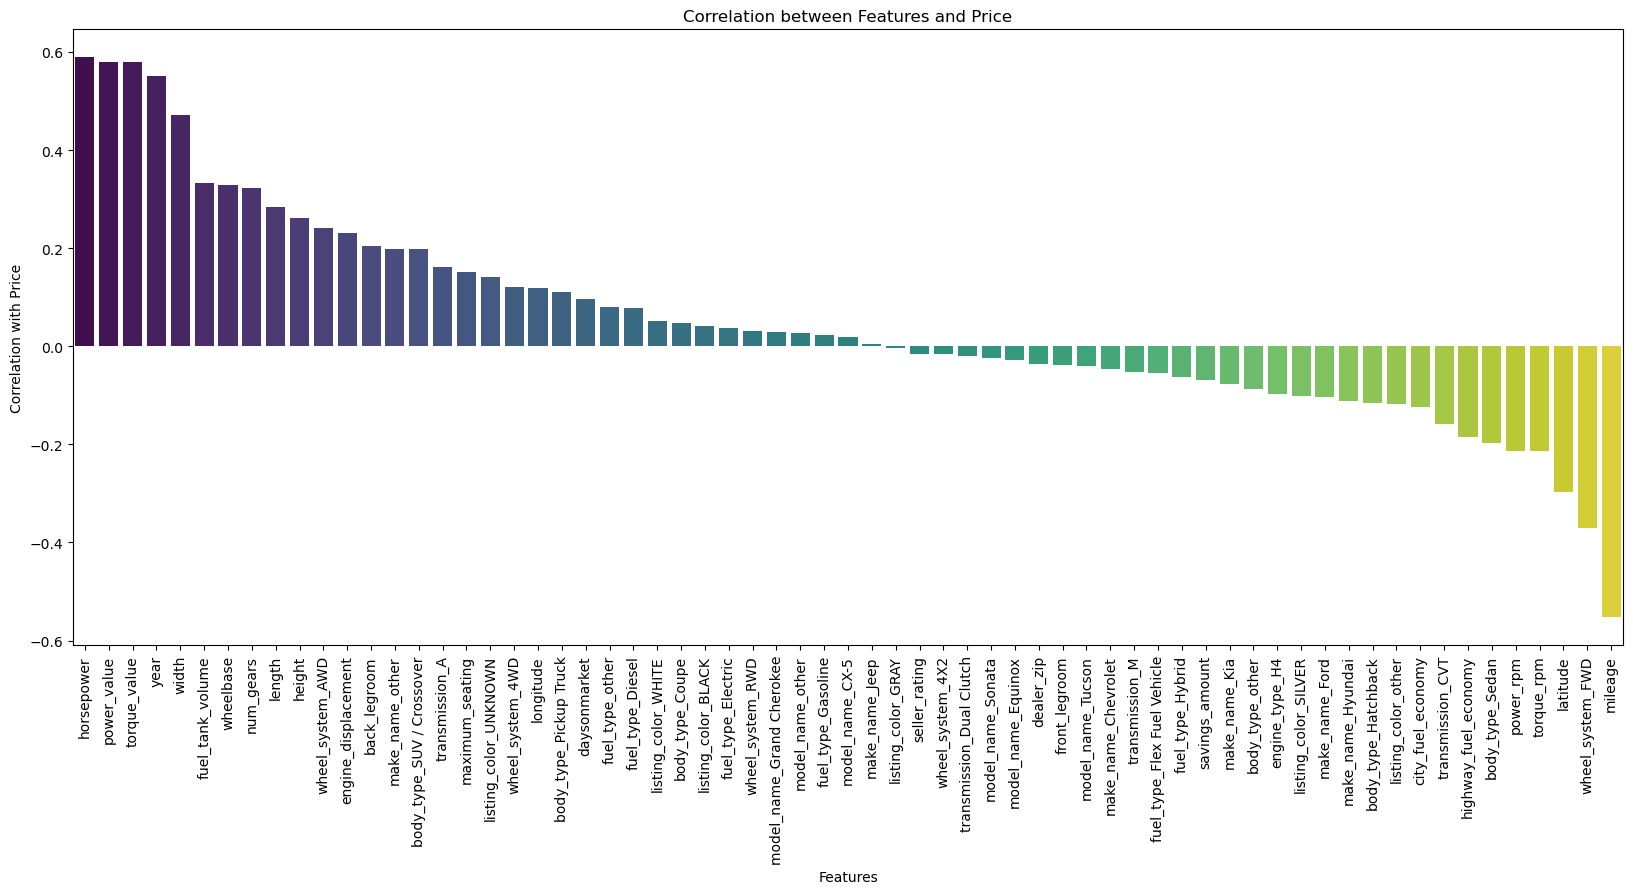

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation of each feature with 'price'
correlations = df_train_encoded.corr()['price'].drop('price').sort_values(ascending=False)  # Drop 'price' itself from the correlations

# Plotting the bar chart
plt.figure(figsize=(20, 8))
sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')
plt.xlabel('Features')
plt.ylabel('Correlation with Price')
plt.title('Correlation between Features and Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

From the first graph, it can be seen that some features has high correlation such as horse power, width, is_new, mileage. Those on the left with darker color are positive correlation while those on the right with lighter color are negative correlation. The further to the side, the stronger the correlation gets. For better understanding, we will select top 10 most correlated with price (in absolute value) then draw scatter plot of each one with price.

### Scatter plot of top 10 most correlated features and price: 

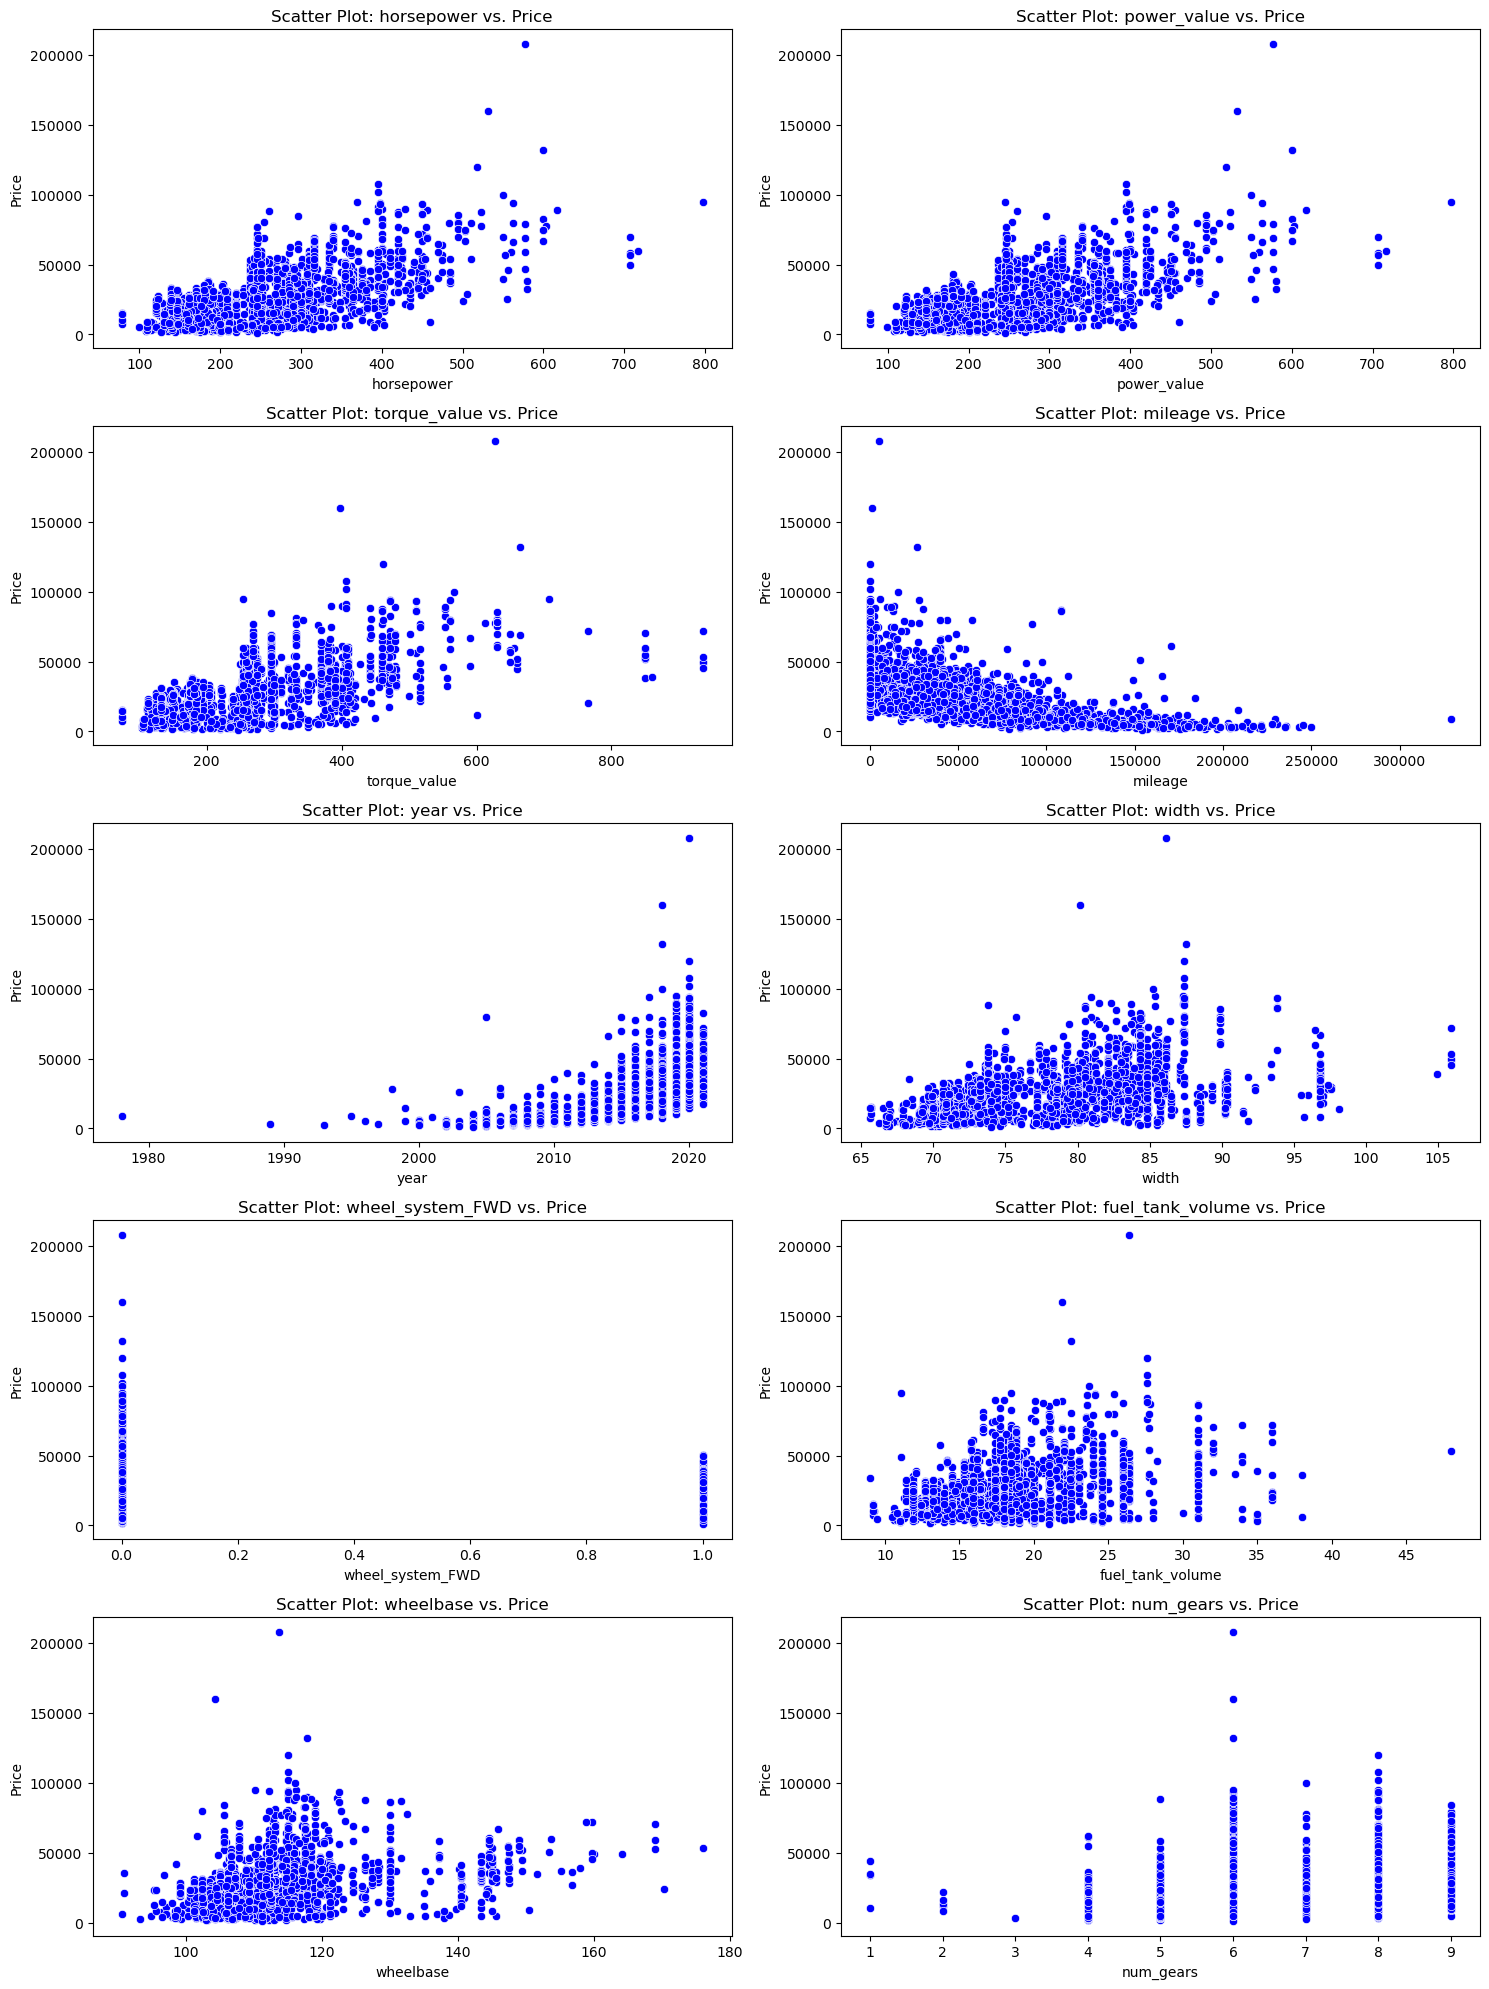

In [9]:
#Numerical Features vs. Price 
#Create scatter plots for top 10 most correlated numerical feature against 'price':
top_numerical_features = correlations.abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(15, 20))
for i, feature in enumerate(top_numerical_features, 1):
    plt.subplot(5, 2, i)
    sns.scatterplot(x=df_train_encoded[feature], y=df_train_encoded['price'], color='blue')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot: {feature} vs. Price')
plt.tight_layout()
plt.show()


A few insights can be gained from the above charts:
- 'horsepower', 'power_value', 'torque_value': show strong positive correlation. This means that the higher of these values, the higher the price. These information suggests that larger and more powerful vehicles tend to be more expensive. 
- While 'mileage' show a negative correlation, 'year' show a positive one. However, these both indicate that the older the car, the cheaper it gets. 
- Other factors such as 'width', 'wheel_system_FWD', 'fuel_tank_volume', 'wheelbase', 'num_gears' also correlated with price. 

There are a few outliers in all the above charts because there are a few cars significantly more expensive than the others. They worths more than 150,000 dollars per car while the other price usually fall below that. 

--- 
## Fit and tune a forecasting model/Submit predictions/Report score and ranking

In [ ]:
# I tried PCA - dimensionality reduction technique that is used to reduce the number of features in a dataset

# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split

# 1. Feature Scaling
# scaler = StandardScaler()
# df_train_scaled = scaler.fit_transform(df_train_encoded.drop("price", axis=1))  

# # 2. Feature Reduction
# pca = PCA(n_components=10)
# df_train_pca = pca.fit_transform(df_train_scaled)

# # Data Preparation

# # Separate features and target from the training dataset
# X_train = df_train_pca
# y_train = df_train_encoded['price']

# Split to have a validation set for initial model evaluation 
# X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# PCA did not work for this data

In [11]:
from sklearn.metrics import mean_squared_error

# Data Preparation
from sklearn.model_selection import train_test_split

# Separate features and target from the training dataset
X_train = df_train_encoded.drop(columns=['price'])
y_train = df_train_encoded['price']

# Split the data into 70% train and 30% test datasets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

X_train_split.shape, X_val_split.shape


((2450, 65), (1050, 65))

### Model 1: Linear Regression
Since the data does not show clear pattern of linear or non-linear relationships between variables, I started with the most simple regression model to check on RMSE first. 

In [12]:
# Model 1: Linear Regression

from sklearn.linear_model import LinearRegression

# Initialize model with default parameters and Fitting Linear Regression

linear_reg = LinearRegression()
linear_reg.fit(X_train_split, y_train_split)
linear_reg_preds = linear_reg.predict(X_val_split)

# Compute RMSE, squared=FALSE means result is the square root of the mean squared error. If squared= TRUE it will return the Mean square error instead 
linear_reg_rmse = mean_squared_error(y_val_split, linear_reg_preds, squared=False)

# print RMSE
linear_reg_rmse

7631.105598238725

### Model 2: Ridge model
Ridge model introduces an L2 regularization term to prevent overfitting. Where a dataset has many features or when features are correlated, plain linear regression can overfit the data. Regularization helps prevent this by adding a penalty for overly complex models. Also, Ridge regression can handle multicollinearity better than plain linear regression. 

In [13]:
# Model 2: Ridge model

from sklearn.linear_model import Ridge

# Fitting Ridge Regression (with default alpha=1.0 for regularization strength)
ridge_reg = Ridge()
ridge_reg.fit(X_train_split, y_train_split)
ridge_reg_preds = ridge_reg.predict(X_val_split)

# Compute RMSE, squared=FALSE means result is the square root of the mean squared error. If squared= TRUE it will return the Mean square error instead 
ridge_reg_rmse = mean_squared_error(y_val_split, ridge_reg_preds, squared=False)

# print RMSE
ridge_reg_rmse


7637.041898828976

### Model 3: Lasso model
Lasso regression introduces an L1 regularization term to the linear regression objective. Lasso regression performs automatic feature selection which is beneficial when we have large number of features. Lasso handles multicollinearity by setting some correlated feature coefficients to zero.

In [14]:
# Model 3: Lasso model

from sklearn.linear_model import Lasso

# Fit data and predict on train split data
lasso_reg = Lasso()
lasso_reg.fit(X_train_split, y_train_split)
lasso_preds = lasso_reg.predict(X_val_split)

# Compute RMSE, squared=FALSE means result is the square root of the mean squared error. If squared= TRUE it will return the Mean square error instead 
lasso_rmse = mean_squared_error(y_val_split, lasso_preds, squared=False)

# print RMSE
print("Lasso RMSE:", lasso_rmse)

Lasso RMSE: 7634.816448009238


### Model 4: Random Forest Regression
This model can capture non-linear relationships in the data by building multiple decision trees during training and making predictions by averaging the predictions of these individual trees. Random forest is advantagous when there are intricate interactions between features like in this data.  

In [15]:
# Model 4: Random Forest Regression model 
from sklearn.ensemble import RandomForestRegressor

# Fit data and predict on train split data
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_split, y_train_split)
rf_reg_preds = rf_reg.predict(X_val_split)

# Compute RMSE, squared=FALSE means result is the square root of the mean squared error. If squared= TRUE it will return the Mean square error instead 
rf_reg_rmse = mean_squared_error(y_val_split, rf_reg_preds, squared=False) 

#print RMSE
rf_reg_rmse

5077.342690181509

In [16]:
#Grid search for Random Forest 

from sklearn.model_selection import GridSearchCV

# Define the parameter grid - n_estimators refers to the number of trees in the forest (default = 100), and max_depth refers to the maximum depth of the tree (default = None)
rf_param_grid = {
    'n_estimators': [50, 100, 150, 500],
    'max_depth': [3, 5, 10]
}

# Grid search 
# cv=5: This is a 5-fold cross-validation. This means the data will be split into 5 subsets, and the model will be trained 5 times, each time leaving out one of the subsets for validation.
# scoring: looking to minimize the root mean squared error 
# n_jobs=-1: use all available cores on your computer to speed up the search process
# verbose=2: the verbosity level of the output

grid_rf = GridSearchCV(estimator=rf_reg, param_grid=rf_param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)
grid_rf.fit(X_train_split, y_train_split)

# Print the best parameters and corresponding score
print("Best Parameters: ", grid_rf.best_params_)
print("Best Negative Mean Squared Error: {:.2f}".format(grid_rf.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters:  {'max_depth': 10, 'n_estimators': 150}
Best Negative Mean Squared Error: -5341.84


In [17]:
# pip install xgboost

### Model 5: eXtreme Gradient Boosting XGBoost
This model has shown better performance in many machine learning competitions. This model incorporates L1 (Lasso) and L2 (Ridge) regularization, which can prevent overfitting. For regression, I use objective function 'reg:squarederror'.

In [18]:
# Model 5: eXtreme Gradient Boosting model

import xgboost as xgb

# Initialize model and fit train split data, then predict on validation data
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train_split, y_train_split)
xgb_pred = xgb_model.predict(X_val_split)

# Calculate RMSE 
xgb_rmse = mean_squared_error(y_val_split, xgb_pred, squared=False)

#print RMSE
xgb_rmse

4936.87816229679

In [19]:
#Grid search for XGBoost: 

param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.02, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
from sklearn.model_selection import GridSearchCV

# Instantiate GridSearchCV with 5-fold cross-validation 
grid_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_xgb.fit(X_train_split, y_train_split)

# Print the best parameters and corresponding score
print("Best Parameters: ", grid_xgb.best_params_)
print("Best Negative Mean Squared Error: {:.2f}".format(grid_xgb.best_score_))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
Best Negative Mean Squared Error: -4721.26


### Choose model
Based on RMSE of all above model, the XGBoost has the best performance because it produces predictions on the validation data with the lowest RMSE, meaning its predictions are closer to the actual price. I decided to use this model with best hyperparameters to predict the test dataset.  

In [ ]:
# The best model found by the grid search
xgb_model = grid_xgb.best_estimator_ 

# Use the best model to make predictions on the test set
predictions = xgb_model.predict(df_test_encoded)

#Return "vin" column to df_test_encoded: 
df_test_encoded['vin'] = vin_column

#Export predictions to csv file to submit on Kaggle
prediction = pd.DataFrame({'vin': df_test_encoded['vin'], 'price': predictions})
# prediction.to_csv('prediction.csv', index=False)

### Limitations of the prediction
Feature Limitations: The quality and quantity of features used to train the model have a significant impact. My clean data might not include powerful features that so the accuracy of my prediction is not improving.  

Overfitting: The model might be trained to fit the training data too closely, it may not generalize well to unseen data. This could be a reason for a higher RMSE on the test set.

Outliers: Car prices can be influenced by outliers, such as luxury cars or classic models. In the dataset, some cars appear to have significantly higher price than average like Bentley, Ferrari, and Land Rover and the model hasn't been trained to handle them, they could disproportionately affect the RMSE.

Number of data entries: the dataset given is relatively small. In order to train a better model in the future, it is advisable to have more data records.